In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import cv2
import numpy as np

In [13]:
def visualize_annotations(image_path, csv_path):

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR to RGB

    annotations = pd.read_csv(csv_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for index, row in annotations.iterrows():
        x_min, y_min, x_max, y_max = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        width, height = x_max - x_min, y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min - 10, row['class_name'], color='g', fontsize=10)

    plt.show()

In [14]:
image_path = 'test/images/00005.jpg'
csv_path = 'test/bbox/00005.csv'

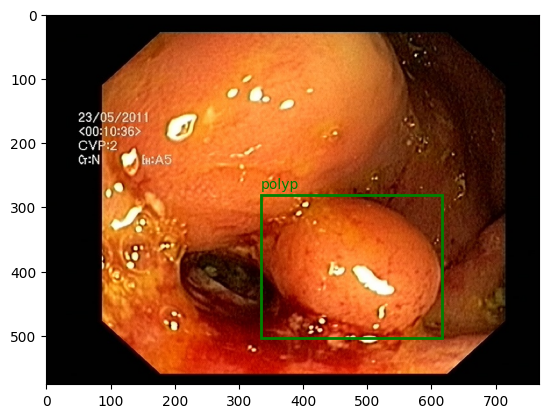

In [15]:
visualize_annotations(image_path, csv_path)

In [22]:
def plot_polygons(image_path, txt_path):

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    polygons = []
    with open(txt_path, 'r') as file:
        for line in file:
            coords = line.strip().split()
            class_id = int(coords[0])
            polygon = np.array([[float(coords[i]), float(coords[i+1])] for i in range(1, len(coords), 2)])
            polygons.append(polygon)

    height, width, _ = img.shape

    plt.imshow(img)
    for polygon in polygons:
        # 将归一化坐标转换为实际像素坐标
        polygon[:, 0] = polygon[:, 0] * width
        polygon[:, 1] = polygon[:, 1] * height
        plt.plot(polygon[:, 0], polygon[:, 1], 'g', linewidth=2)
        plt.fill(polygon[:, 0], polygon[:, 1], alpha=0.7)

    # plt.axis('off')
    plt.show()

In [23]:
image_path = 'test/images/00005.jpg'
txt_path = 'test/seg/yolo/00005.txt'

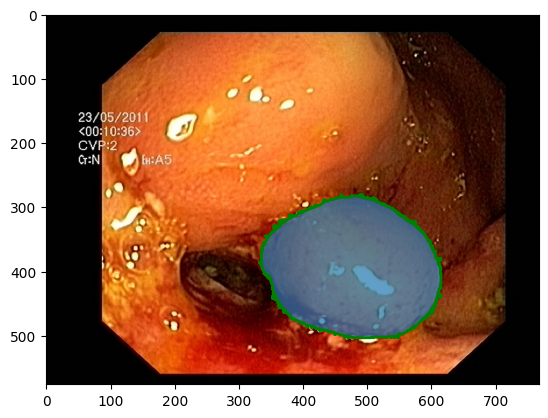

In [24]:
plot_polygons(image_path, txt_path)